## Customer Ticket Dataset
This custom dataset contains a collection of customer tickets encompassing a wide range of inquiries and issues commonly encountered in various domains, including E-commerce, technical support, and software development. The dataset is designed for text classification and natural language processing (NLP) tasks, allowing you to create and evaluate models for automatically categorizing customer tickets into different categories.
https://www.kaggle.com/datasets/suraj520/customer-support-ticket-dataset

In [1]:
import os
import gdown
import random
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')


### Downloading a data from a google drive link using gdown

In [2]:
!gdown https://drive.google.com/uc?id=19gCO-pD9olsPxNWXAlTQ5zPkfm6t82dB

Downloading...
From: https://drive.google.com/uc?id=19gCO-pD9olsPxNWXAlTQ5zPkfm6t82dB
To: /content/customer_support_tickets.csv
100% 3.95M/3.95M [00:00<00:00, 135MB/s]


## Loading a pandas dataframe

In [3]:
customer_df = pd.read_csv('customer_support_tickets.csv')
print(customer_df.shape)
customer_df.head()

(8469, 17)


,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,2023-06-01 12:15:36,NaN,NaN
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Chat,2023-06-01 16:45:38,NaN,NaN
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0


In [4]:
filter_df = customer_df[['Product Purchased', 'Date of Purchase', 'Ticket Type',
                'Ticket Subject', 'Ticket Description']]

## Checking Null Values


In [5]:
filter_df.isnull().sum()

Product Purchased     0
Date of Purchase      0
Ticket Type           0
Ticket Subject        0
Ticket Description    0
dtype: int64

In [6]:
def plot_bar_graph(data, x_col, y_col, title, palette='viridis'):
    """
    Plot a bar graph using Seaborn.

    Parameters:
        data (DataFrame): The DataFrame containing the data.
        x_col (str): The name of the column for the x-axis.
        y_col (str): The name of the column for the y-axis.
        title (str): The title of the plot.
        palette (str, optional): The color palette to use. Default is 'viridis'.
    """
    plt.figure(figsize=(10, 6))
    sns.barplot(x=x_col, y=y_col, data=data, palette=palette)

    # Add labels and title
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.title(title)

    # Show the plot
    plt.show()


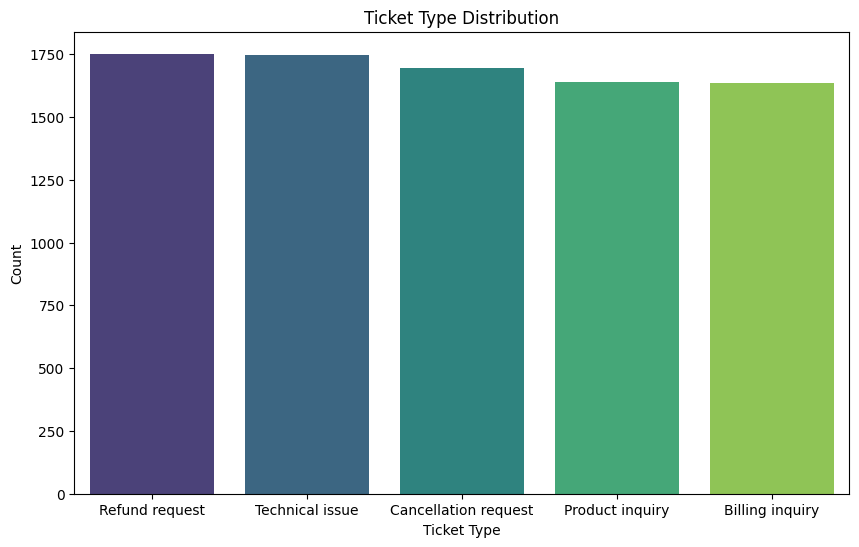

In [7]:
# Assuming you have the data in a DataFrame called filter_df
ticket_type_data = filter_df['Ticket Type'].value_counts().reset_index()
ticket_type_data.columns = ['Ticket Type', 'Count']

# Plot ticket type distribution
plot_bar_graph(data=ticket_type_data, x_col="Ticket Type", y_col="Count", title="Ticket Type Distribution")

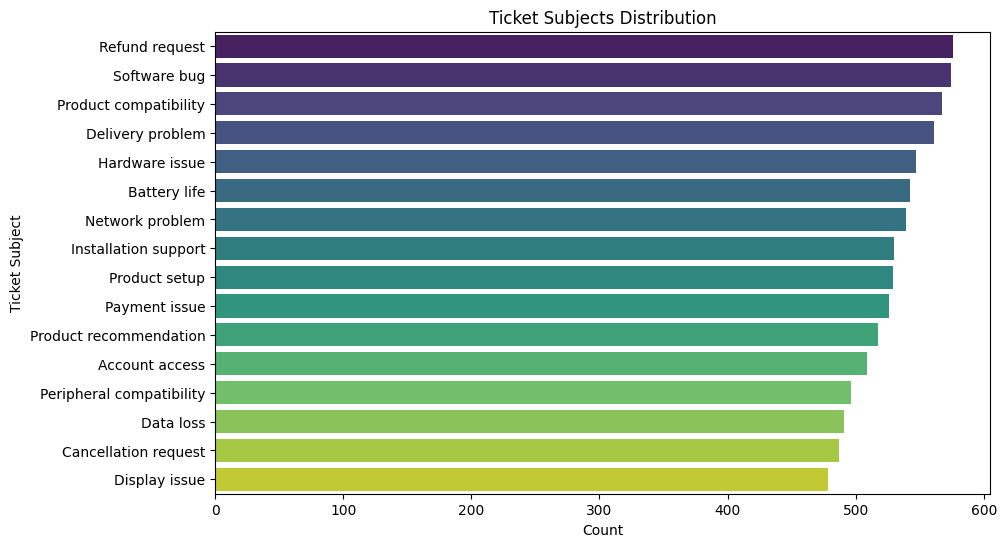

In [8]:
# Assuming you have the data in a DataFrame called filter_df
ticket_subject_data = filter_df['Ticket Subject'].value_counts().reset_index()
ticket_subject_data.columns = ['Ticket Subject', 'Count']

# Plot ticket type distribution
plot_bar_graph(data=ticket_subject_data, x_col="Count",
               y_col="Ticket Subject", title="Ticket Subjects Distribution")

<h1>Ticket Classification and Email Generation</h1>
<ol>
    <li>We aim to identify and categorize tickets as "Angry" when their "Ticket Subject" is labeled as "Software bug" and their "Ticket Type" is marked as "Technical issue." For these identified tickets, we intend to generate corresponding angry emails.</li>
    <li>Conversely, we seek to classify tickets as "Help" tickets when their "Ticket Type" is specified as "Product inquiry." For these categorized tickets, we aim to generate help-related emails.</li>
</ol>


In [9]:
angry_emails = filter_df[((filter_df['Ticket Subject'] == "Software bug") &
                         (filter_df['Ticket Type']== "Technical issue"))]
print(angry_emails.shape)

(118, 5)


In [10]:
help_emails = filter_df.loc[(filter_df['Ticket Type']=='Product inquiry') &
                            (filter_df["Ticket Subject"].isin(["Product setup",
                                                               "Installation support"]))]
print(help_emails.shape)

(199, 5)


In [11]:
final_df = pd.concat([angry_emails, help_emails], axis=0)
final_df.reset_index(drop =True, inplace=True)
final_df.shape

(317, 5)

<h1>Email Dataset Creation</h1>
<p>We aim to create an email dataset comprising various product names categorized into distinct product categories such as ERP, CRM, Appointment Booking, and Others. To achieve this, we have constructed a Pandas dataframe containing information about product types and product names.</p>

<ol>
    <li>Our goal is to compile an email dataset that includes a diverse range of product names sorted into specific product categories, including ERP, CRM, Appointment Booking, and Other.</li>
    <li>To facilitate this task, we've constructed a Pandas dataframe that contains data pertaining to product types and their corresponding product names.</li>
</ol>


In [12]:
import pandas as pd

data = {
    'Product Type': ['ERP'] * 10 + ['CRM'] * 10 + ['Appointment Booking'] * 10 + ['Other'] * 10,
    'Product Name': [
        'SAP ERP', 'Oracle ERP Cloud', 'Microsoft Dynamics 365', 'NetSuite ERP', 'Infor CloudSuite',
        'Epicor ERP', 'Acumatica ERP', 'Odoo', 'Sage X3', 'Workday Financial Management',
        'Salesforce', 'HubSpot CRM', 'Zoho CRM', 'Microsoft Dynamics 365 CRM', 'Pipedrive',
        'Freshsales', 'Insightly', 'Nimble', 'SugarCRM', 'Bitrix24',
        'Calendly', 'Acuity Scheduling', 'Setmore', 'SimplyBook.me', 'Bookly',
        'Square Appointments', 'Appointy', 'Schedulicity', 'YouCanBook.me', 'Timely',
        'Adobe Creative Cloud', 'Slack', 'Zoom', 'Trello', 'QuickBooks',
        'Dropbox', 'Atlassian Jira', 'Autodesk AutoCAD', 'Tableau', 'LastPass'
    ]
}

product_df = pd.DataFrame(data)


<ol>
<li>We will create a new DataFrame that compiles a list of various products associated with Enterprise, CRM, or Appointment booking.</li>
<li>This newly created DataFrame comprises 317 rows, which align with the 317 rows we previously generated for angry and help emails.</li>
<li>Now, our intention is to utilize these product names from the new DataFrame in place of the previous products for our specific use case.</li>
</ol>






In [13]:
all_product_name = pd.DataFrame(columns=['Product Name'])

for _ in range(317):
    random_product = random.choice(product_df['Product Name'])
    all_product_name = all_product_name.append({'Product Name': random_product},
                                               ignore_index=True)

In [14]:
combined_product_df = pd.merge(product_df, all_product_name, how="inner", on="Product Name")
combined_product_df.shape

(317, 2)

<ol>

**<li>In our DataFrame, we are specifying both new product names and new product types.</li>**
**<li>This allows us to tailor our email generation process to accommodate these updated product names and types, aligning with the specific requirements outlined in our problem statement.</li>**
**<li>We are tasked with crafting emails that encompass a variety of product categories, including CRM, Enterprise, Appointment Booking Software, and others.</li>**

</ol>

In [15]:
final_df['new_product_name'] = combined_product_df['Product Name']
final_df['new_product_type'] = combined_product_df['Product Type']

In [17]:
# Define a function to replace the placeholder
def replace_product_name(row):
    """
    Replaces a placeholder in the ticket description with the actual product purchased.

    Parameters:
        row (pd.Series): A pandas Series representing a row in a DataFrame, containing at least 'new_product_name' and 'Ticket Description' columns.

    Returns:
        str: The updated ticket description with the '{product_purchased}' placeholder replaced by the actual product name.
    """
    product_purchased = row['new_product_name']
    ticket_description = row['Ticket Description']
    updated_description = ticket_description.replace('{product_purchased}', product_purchased)
    return updated_description


In [18]:
final_df['Ticket Description'] = final_df.apply(replace_product_name, axis=1)

## Product Type Distribution

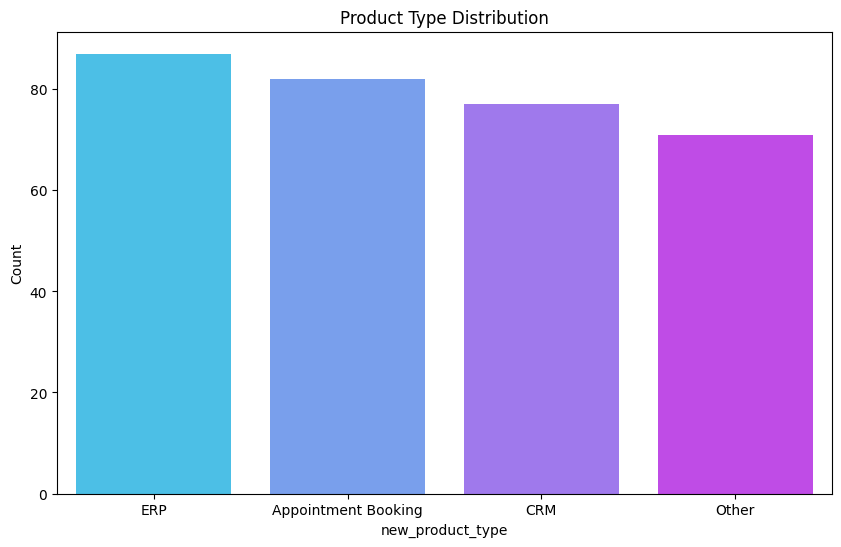

In [24]:
product_type_data = final_df['new_product_type'].value_counts().reset_index()
product_type_data.columns = ['new_product_type', 'Count']

# Plot ticket type distribution
plot_bar_graph(data=product_type_data, x_col="new_product_type",
               y_col="Count",
               title="Product Type Distribution",
               palette='cool')

## Selecting only five columns

In [25]:
final_df = final_df[['Ticket Type', 'Ticket Subject', 'Ticket Description', 'new_product_name', 'new_product_type']]

**<li>The dictionary below will associate various software products with their corresponding categories.</li>**

**<li>It will categorize software products into four main categories: ERP (Enterprise Resource Planning), CRM (Customer Relationship Management), Appointment Booking, and Other.</li>**

**<li>Each software product is mapped to one of these categories, providing a structured classification of different software solutions based on their functions or purposes.</li>**

In [26]:
product_dict = dict(zip(final_df['new_product_name'], final_df['new_product_type']))
product_dict

{'SAP ERP': 'ERP',
 'Oracle ERP Cloud': 'ERP',
 'Microsoft Dynamics 365': 'ERP',
 'NetSuite ERP': 'ERP',
 'Infor CloudSuite': 'ERP',
 'Epicor ERP': 'ERP',
 'Acumatica ERP': 'ERP',
 'Odoo': 'ERP',
 'Sage X3': 'ERP',
 'Workday Financial Management': 'ERP',
 'Salesforce': 'CRM',
 'HubSpot CRM': 'CRM',
 'Zoho CRM': 'CRM',
 'Microsoft Dynamics 365 CRM': 'CRM',
 'Pipedrive': 'CRM',
 'Freshsales': 'CRM',
 'Insightly': 'CRM',
 'Nimble': 'CRM',
 'SugarCRM': 'CRM',
 'Bitrix24': 'CRM',
 'Calendly': 'Appointment Booking',
 'Acuity Scheduling': 'Appointment Booking',
 'Setmore': 'Appointment Booking',
 'SimplyBook.me': 'Appointment Booking',
 'Bookly': 'Appointment Booking',
 'Square Appointments': 'Appointment Booking',
 'Appointy': 'Appointment Booking',
 'Schedulicity': 'Appointment Booking',
 'YouCanBook.me': 'Appointment Booking',
 'Timely': 'Appointment Booking',
 'Adobe Creative Cloud': 'Other',
 'Slack': 'Other',
 'Zoom': 'Other',
 'Trello': 'Other',
 'QuickBooks': 'Other',
 'Dropbox': 'Oth

**<li>We are in the process of creating 133 new rows of happy customer emails.</li>**

**<li>These emails will express their satisfaction, but we've only established the ticket type and ticket subject for now.</li>**

**<li>In the future, when generating these emails using OpenAI's generative AI, we'll populate the data with these provided product names.</li>**

**<li>This will enable the AI to generate emails with all the necessary context,  and the context of the customer's happiness as input for email generation.</li>**

In [27]:
# Create the happy_email DataFrame
num_rows = 133
happy_email = pd.DataFrame({
    "Ticket Type": ['Joyful Shoutout'] * num_rows,
    "Ticket Subject": ['Awesome Addition'] * num_rows,
    "Ticket Description": [''] * num_rows,
    "new_product_name": random.choices(final_df['new_product_name'], k=num_rows),
})

# Map the new_product_type using the dictionary
happy_email["new_product_type"] = happy_email["new_product_name"].map(product_dict)



In [28]:
happy_email['Ticket Description'] = "The product name is " + happy_email["new_product_name"]

## We are merging happy, angry, and help email categories into one final dataframe.






In [30]:
final_df = pd.concat([final_df, happy_email], axis=0)
print(final_df.shape)

(450, 5)


In [31]:
final_df.to_csv('product_sentiment_analysis.csv', index=False)